# Basic Dataframe Manipulation

Using data from the IMF and SIPRI to explore the military expenditures of G20 countries.

Sources of data:

International Monetary Fund
World Economic Outlook Database
http://www.imf.org/external/pubs/ft/weo/2015/02/weodata/index.aspx

Stockholm International Peace Research Institute
SIPRI Military Expenditure Database
https://www.sipri.org/databases/milex

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### IMF Data

In [2]:
path_to_data1 = ".xlsx"

# read in file
xl_file = pd.ExcelFile(path_to_data1)
df_imf= pd.io.excel.ExcelFile.parse(xl_file, "Sheet 1", header=1)
df_imf.columns

# fix column names
df_imf.columns = ('Country','Subject Descriptor','Units','Scale','Country/Series-specific Notes','2009','2010','2011','2012','2013','2014','2015','Estimates Start After')
df_imf.columns

Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Estimates Start After'],
      dtype='object')

The countries repeat three times because GDP, GDP/Capita, and Population are on different rows. There are extra rows at the end.  This needs to be fixed up.

Additionally, GDP is measured in billions whereas population is measured in millions.  The difference in scale must be accounted for.

In [3]:
df_imf.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2009,2010,2011,2012,2013,2014,2015,Estimates Start After
0,Argentina,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",376.826,461.652,558.681,607.596,622.054,543.061,578.705,2014.0
1,Australia,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",981.617,1244.973,1499.947,1555.263,1497.218,1442.722,1240.803,2014.0
2,Brazil,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",1666.768,2209.266,2613.061,2412.024,2391.029,2346.583,1799.612,2014.0
3,Canada,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",1370.839,1614.072,1788.741,1832.716,1838.964,1785.387,1572.781,2014.0
4,China,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",5059.716,6039.547,7492.529,8461.511,9490.845,10356.508,11384.763,2014.0


In [4]:
df_imf.tail()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2009,2010,2011,2012,2013,2014,2015,Estimates Start After
54,Turkey,Population,Persons,Millions,"Source: Haver Analytics. Formally, the Turkish...",72.039,73.142,74.224,75.176,76.055,76.903,77.738,2013.0
55,United Kingdom,Population,Persons,Millions,Source: National Statistics Office Latest actu...,61.792,62.262,63.285,63.705,64.087,64.511,64.938,2014.0
56,United States,Population,Persons,Millions,Source: National Statistics Office Latest actu...,307.374,309.761,312.075,314.402,316.742,319.075,321.410,2015.0
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# List just one column of data
df_imf['Country']

0                                             Argentina
1                                             Australia
2                                                Brazil
3                                                Canada
4                                                 China
5                                                France
6                                               Germany
7                                                 India
8                                             Indonesia
9                                                 Italy
10                                                Japan
11                                                Korea
12                                               Mexico
13                                               Russia
14                                         Saudi Arabia
15                                         South Africa
16                                               Turkey
17                                       United 

In [6]:
# List data types
df_imf.dtypes

Country                           object
Subject Descriptor                object
Units                             object
Scale                             object
Country/Series-specific Notes     object
2009                             float64
2010                             float64
2011                             float64
2012                             float64
2013                             float64
2014                             float64
2015                             float64
Estimates Start After            float64
dtype: object

Start by separating the data into two dataframes - one for each variable of interest.

In [7]:
# Slice dataframe by row indices.
df_GDP = df_imf[0:19]
df_Pop = df_imf[38:57]

In [8]:
# Selecting only relevant columns of the dataframe by column name.  Note the double brackets.
df_GDP = df_GDP[['Country','2009','2010','2011','2012','2013','2014','2015']]
df_Pop = df_Pop[['Country','2009','2010','2011','2012','2013','2014','2015']]

In [9]:
# View the resulting dataframe.
df_GDP.head(3)

,Country,2009,2010,2011,2012,2013,2014,2015
0,Argentina,376.826,461.652,558.681,607.596,622.054,543.061,578.705
1,Australia,981.617,1244.973,1499.947,1555.263,1497.218,1442.722,1240.803
2,Brazil,1666.768,2209.266,2613.061,2412.024,2391.029,2346.583,1799.612


Rearrange the dataframe so that the year is a separate column and GDP values are clearly labeled.

In [10]:
# Melt the data using Country as the identifier.  Un-pivot the remaining columns.  Name the new columns.
df_GDP2 = pd.melt(df_GDP, id_vars='Country', value_vars=list(df_GDP.columns[1:]), var_name='Year', value_name='GDP')
df_Pop2 = pd.melt(df_Pop, id_vars='Country', value_vars=list(df_Pop.columns[1:]), var_name='Year', value_name='Population')

In [11]:
# View the new dataframe
df_GDP2.head(3)

,Country,Year,GDP
0,Argentina,2009,376.826
1,Australia,2009,981.617
2,Brazil,2009,1666.768


Rescale the population variable.

In [12]:
# change scale of Population to be in billions to divide more easily with GDP
df_Pop3 = df_Pop2
df_Pop3['Population'] = (df_Pop3['Population'] / 1000)

In [13]:
# merge dataframes
df_IMF = pd.merge(df_GDP2, df_Pop3[['Population']], left_index=True, right_index=True, how='outer')

In [14]:
df_IMF.head()

,Country,Year,GDP,Population
0,Argentina,2009,376.826,0.040134
1,Australia,2009,981.617,0.021866
2,Brazil,2009,1666.768,0.193544
3,Canada,2009,1370.839,0.033581
4,China,2009,5059.716,1.334500


## SIPRI Data

In [15]:
path_to_data2 = ".xlsx"

# read in file
sipri_file = pd.ExcelFile(path_to_data2)
df_milExpend = pd.io.excel.ExcelFile.parse(sipri_file, "Constant (2014) USD", header=5, na_values=['. .'])
df_milExpend = df_milExpend[['Country',2009,2010,2011,2012,2013,2014,2015]]
df_milExpend.columns

Index(['Country', 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype='object')

We will restrict analysis to the G20 countries.

In [16]:
# Make a list.
g20 = ['Argentina','Australia','Brazil','Canada','China','France','Germany','India','Indonesia','Italy','Japan','Korea','Mexico','Russia','Saudi Arabia','South Africa','Turkey','United Kingdom','United States']

Standardize country names in the dataframe to match the IMF dataframe.

In [17]:
# Replace a column name in a dataframe
df_milExpend = df_milExpend.replace(to_replace='USA', value='United States')
df_milExpend = df_milExpend.replace(to_replace='China, P.R.', value='China')
df_milExpend = df_milExpend.replace(to_replace='Korea, South', value='Korea')
df_milExpend = df_milExpend.replace(to_replace='USSR/Russia', value='Russia')
df_milExpend = df_milExpend.replace(to_replace='UK', value='United Kingdom')

Keep only the rows for the G20 countries.

In [18]:
# Filter out rows that are not contained within a list.
df_g20Mil = df_milExpend[df_milExpend['Country'].isin(g20)]

# Sort dataframe by the values in a column.
df_g20Mil = df_g20Mil.sort_values(by='Country')

In [19]:
df_g20Mil.head(3)

,Country,2009,2010,2011,2012,2013,2014,2015
73,Argentina,2455.18,2712.69,3047.82,3443.44,4217.54,4979.44,5342
118,Australia,24876.8,25184,24835.1,23964.8,23756.7,25783.7,27793
75,Brazil,29047,32256.6,31244.9,31846.2,32020.2,32659.6,31953.6


Un-pivot the military expenditure data.

In [20]:
# Reformat dataframe with column for year and column for military expenditures
df_g20Mil2 = pd.melt(df_g20Mil, id_vars='Country', value_vars=list(df_g20Mil.columns[1:]), var_name='Year', value_name='milExpnd')

In [21]:
df_g20Mil2.head(3)

,Country,Year,milExpnd
0,Argentina,2009,2455.18
1,Australia,2009,24876.8
2,Brazil,2009,29047


As before, change the scale to billions

In [22]:
df_g20Mil2['milExpnd'] = (df_g20Mil2['milExpnd'] / 1000)

## Merge and sort the IMF and SIPRI data

In [23]:
# Merge dataframes
df_g20 = pd.merge(df_IMF, df_g20Mil2[['milExpnd']], left_index=True, right_index=True, how='outer')

In [24]:
# Check new dataframe to identify problems in the shape
df_g20.shape

(133, 5)

In [25]:
# Check new dataframe to identify problems in the data types
df_g20.dtypes

Country        object
Year           object
GDP           float64
Population    float64
milExpnd       object
dtype: object

Convert milExpnd to float rather than string

In [26]:
# Change the data type of one column
df_g20['milExpnd'] = df_g20['milExpnd'].astype(float)

In [27]:
# check data again
df_g20.dtypes

Country        object
Year           object
GDP           float64
Population    float64
milExpnd      float64
dtype: object

Create "GDP per capita" variable

In [28]:
# Define a new variable with a column label
df_g20['GDPCap'] = (df_g20['GDP'] / df_g20['Population'])

Define a "military expenditures per capita" variable

In [29]:
df_g20['milExpndCap'] = (df_g20['milExpnd'] / df_g20['Population'])
df_g20.dtypes

Country         object
Year            object
GDP            float64
Population     float64
milExpnd       float64
GDPCap         float64
milExpndCap    float64
dtype: object

Create dataframes for GDP and military expenditure in real and per capita dollars

In [30]:
# Create dataframes of subsets of larger dataframe
df_GDP = df_g20[['Country','Year','GDP']]
df_MilSpend = df_g20[['Country','Year','milExpnd']]
df_GDPC = df_g20[['Country','Year','GDPCap']]
df_MSCap = df_g20[['Country','Year','milExpndCap']]

Index the dataframes

In [31]:
# Index based on country and then year
df_GDPi = df_GDP.set_index(['Country','Year']).sort_index()
df_MilSpendi = df_MilSpend.set_index(['Country','Year']).sort_index()
df_GDPCi = df_GDPC.set_index(['Country','Year']).sort_index()
df_MSCapi = df_MSCap.set_index(['Country','Year']).sort_index()

## Define plots & top 10 lists

In [32]:
# plots GDP
def plotGDP(Country):
    data = df_GDPi.loc[Country]
    plt.plot(data.index, data.values)
    ax = plt.gca()
    #ax.get_xaxis().get_major_formatter().set_useOffset(False)
    #ax.set_ylim([0,10000])
    plt.xlabel('Year')
    plt.ylabel('Billions U.S. Dollars (2014)')
    plt.legend(data)
    plt.title(Country) 

# plots military spending
def plotMilSpend(Country):
    data = df_MilSpendi.loc[Country]
    plt.plot(data.index, data.values)
    ax = plt.gca()
    #ax.get_xaxis().get_major_formatter().set_useOffset(False)
    plt.xlabel('Year')
    plt.ylabel('Billions U.S. Dollars (2014)')
    plt.legend(data)
    plt.title(Country)

# plots GDP per capita
def plotGDPCapita(Country):
    data = df_GDPCi.loc[Country]
    plt.plot(data.index, data.values)
    ax = plt.gca()
    #ax.get_xaxis().get_major_formatter().set_useOffset(False)
    plt.xlabel('Year')
    plt.ylabel('U.S. Dollars (2014) Per Person')
    plt.legend(data)
    plt.title(Country)

# plots GDP and military spending per capita
def plotMilPerCapita(Country):
    data = df_MSCapi.loc[Country]
    plt.plot(data.index, data.values)
    ax = plt.gca()
    #ax.get_xaxis().get_major_formatter().set_useOffset(False)
    plt.xlabel('Year')
    plt.ylabel('U.S. Dollars (2014) Per Person')
    plt.legend(data)
    plt.title(Country)

# create list of top ten countries in terms of military spending    
def topten():
    a = df_MilSpendi.sort_index()
    b = a.sort_values(by='milExpnd', ascending=False)
    c = pd.DataFrame(list(b.index.values))
    d = c.drop(1, axis=1)
    d.columns=['Country']
    e = d.drop_duplicates().reset_index()
    e.index = e.index + 1
    e.drop('index', axis=1, inplace=True)
    return e.head(10)    

# create list of top ten countries in terms of military spending per capita   
def topten_perCapita():
    a = df_MSCapi.sort_index()
    b = a.sort_values(by='milExpndCap', ascending=False)
    c = pd.DataFrame(list(b.index.values))
    d = c.drop(1, axis=1)
    d.columns=['Country']
    e = d.drop_duplicates().reset_index()
    e.index = e.index + 1
    e.drop('index', axis=1, inplace=True)
    return e.head(10)   

# Calculates percentage change between military spending in 2009 and 2015 for each country
def calc_percentage(year_beg, year_end, country, df):
    percentage_change = ((df.loc[country].iloc[6]-df.loc[country].iloc[0])/df.loc[country].iloc[0]) * 100
    return percentage_change

Plot GDP by year for each country in a series of plots

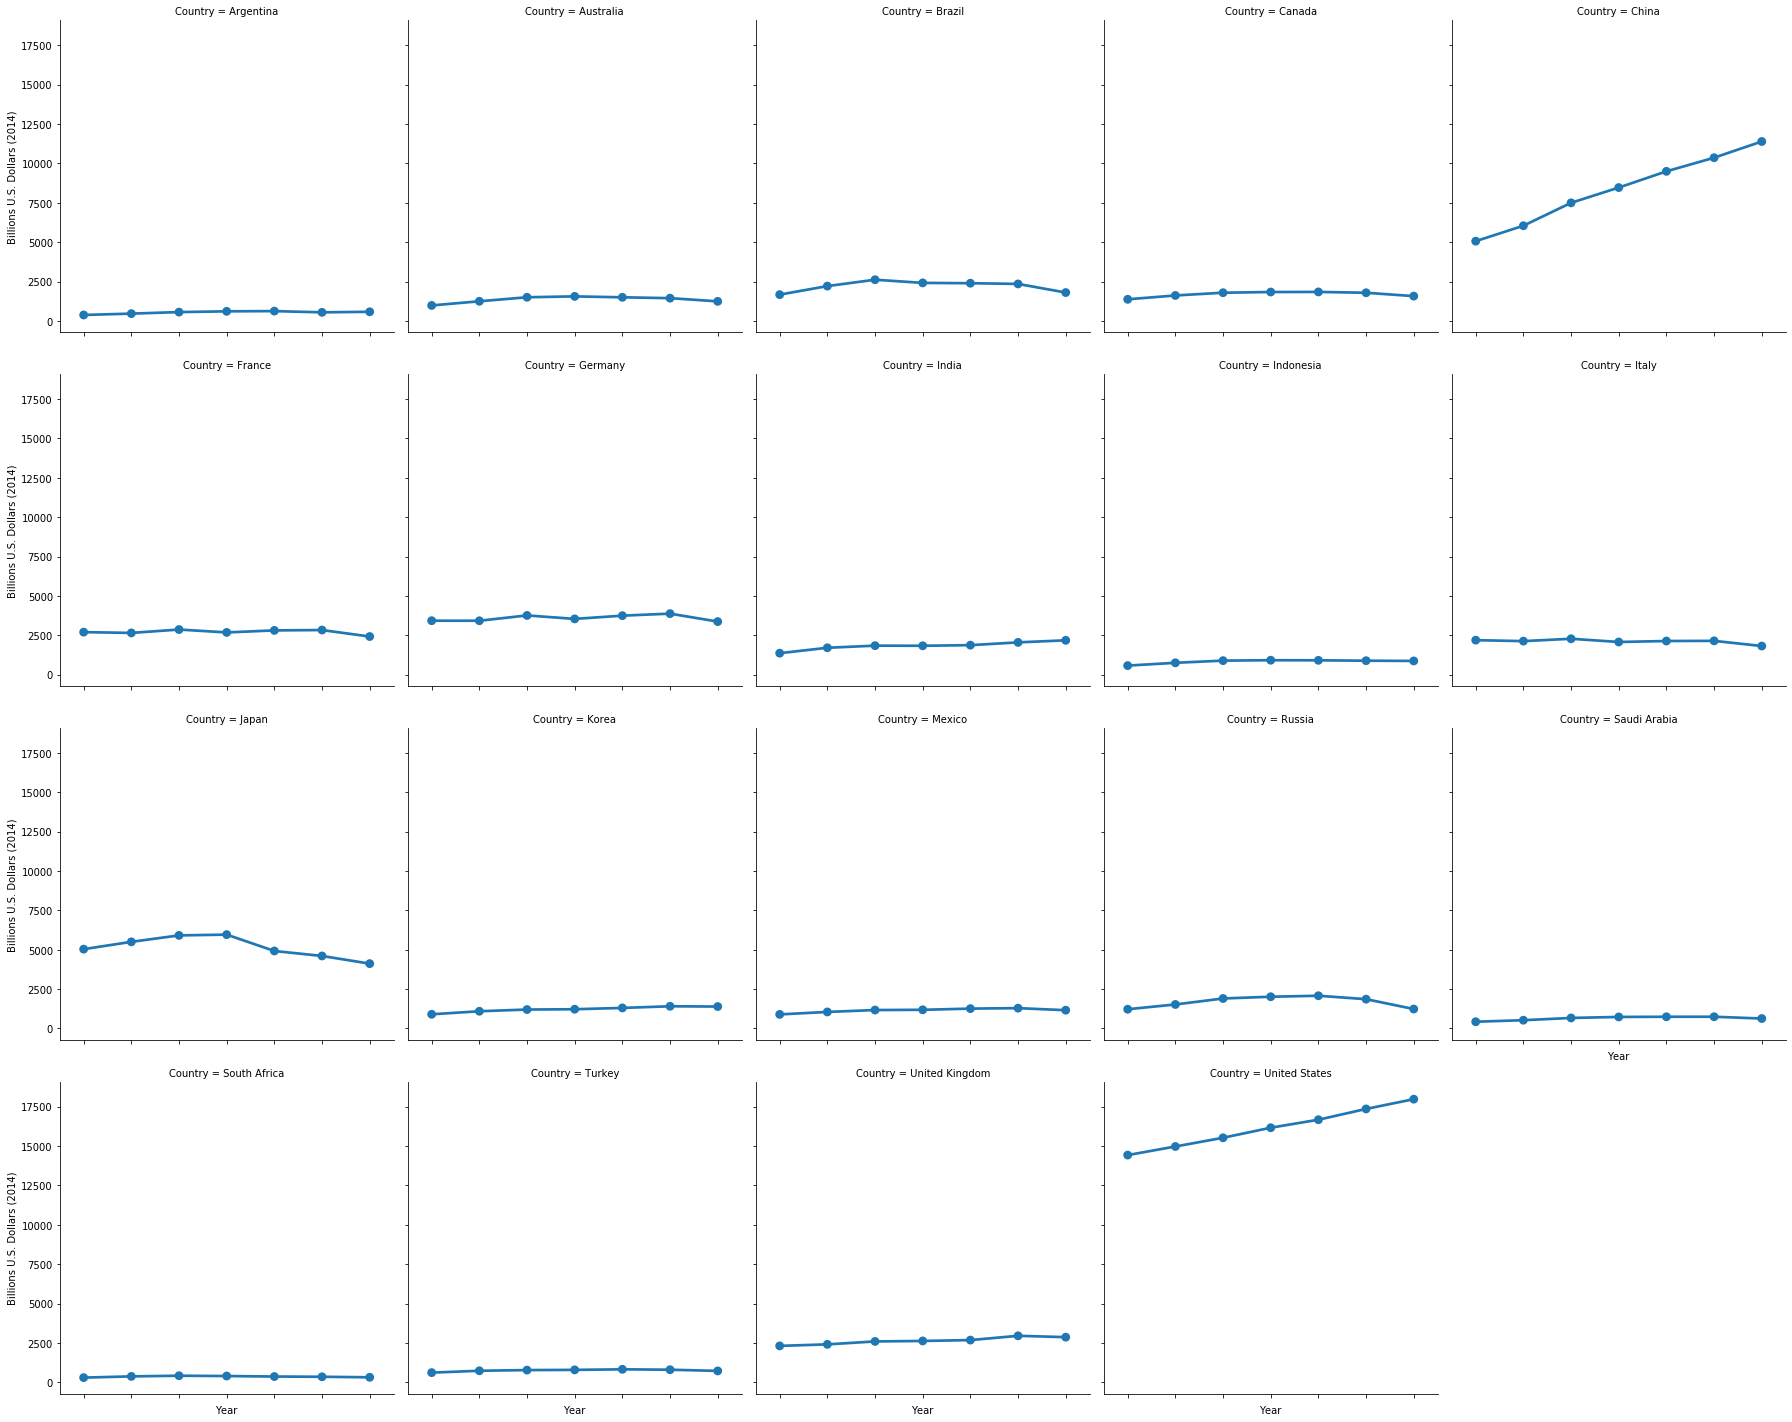

In [34]:
# Seaborn factorplot
fg = sns.factorplot(data=df_g20, x='Year', y='GDP', col='Country', col_wrap=5)
fg.set_xticklabels(rotation=30)
fg.set_ylabels('Billions U.S. Dollars (2014)')

Plot military expenditure by year for each country in a series of plots

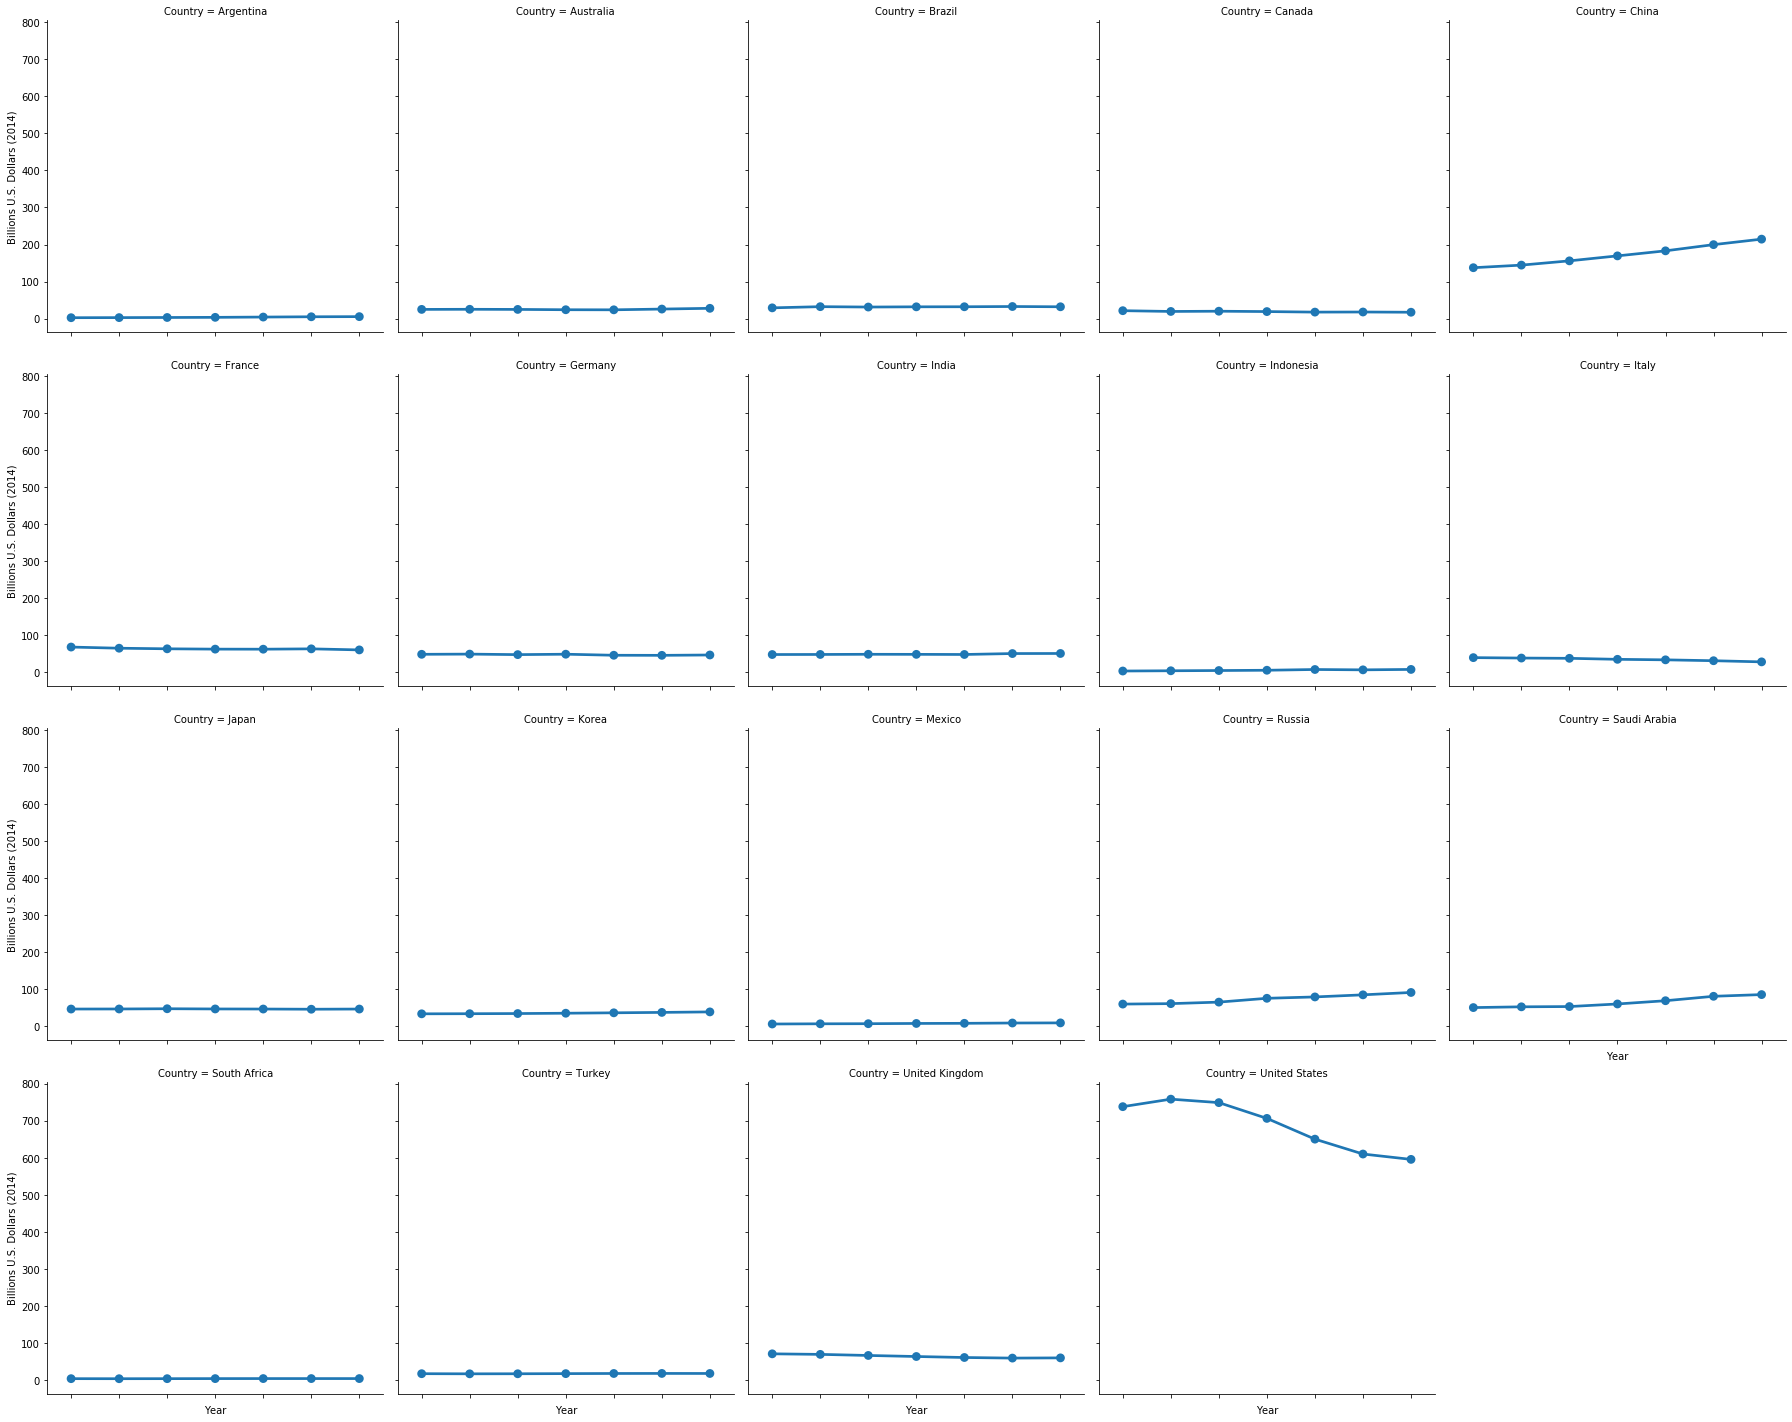

In [35]:
fg = sns.factorplot(data=df_g20, x='Year', y='milExpnd', col='Country', col_wrap=5)
fg.set_xticklabels(rotation=30)
fg.set_ylabels('Billions U.S. Dollars (2014)')

Create a plot for each country showing GDP (same information as above, but does not use Seaborn)

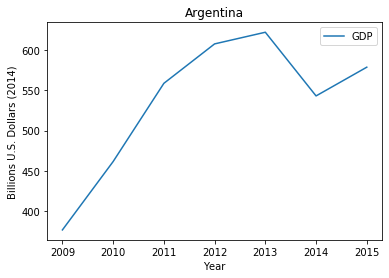

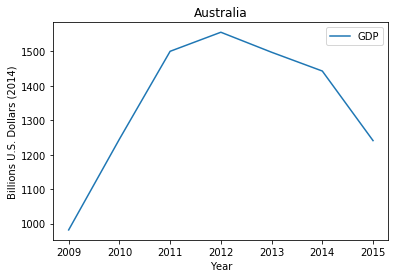

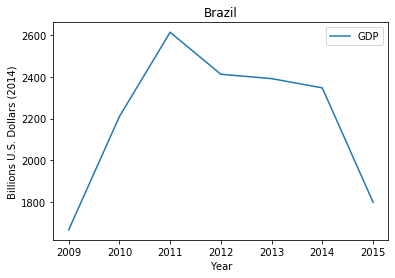

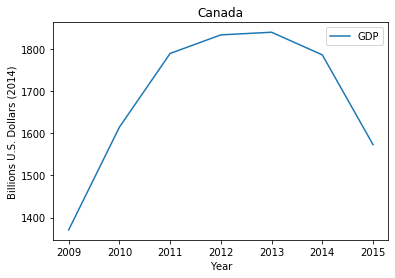

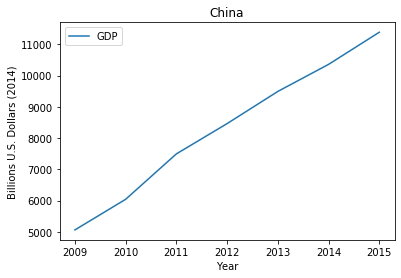

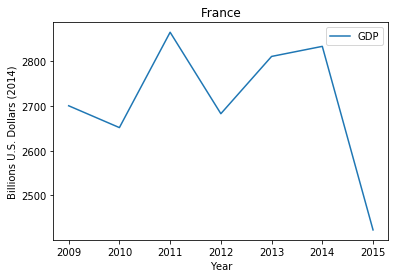

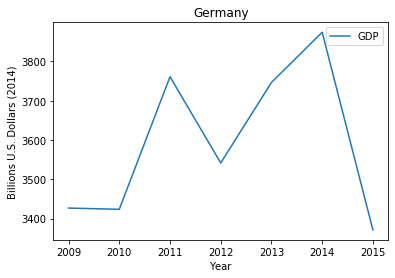

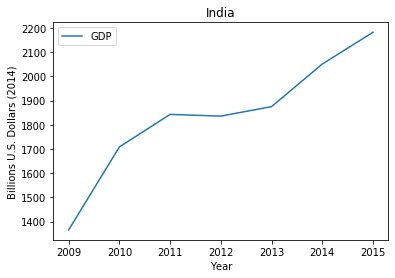

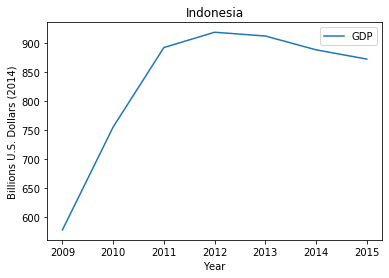

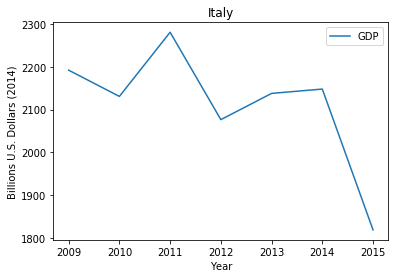

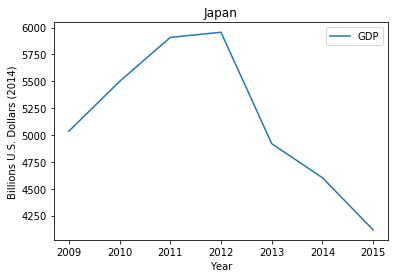

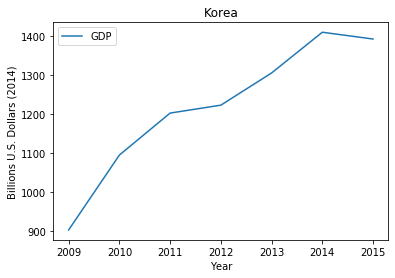

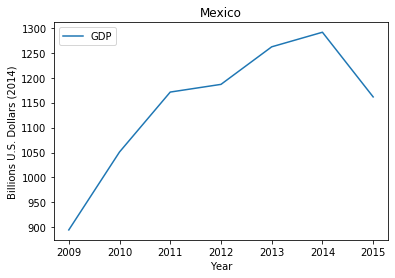

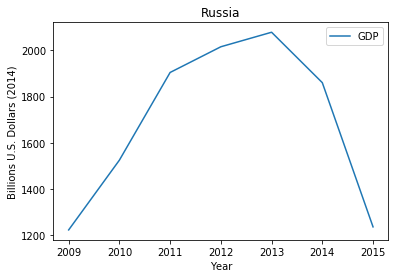

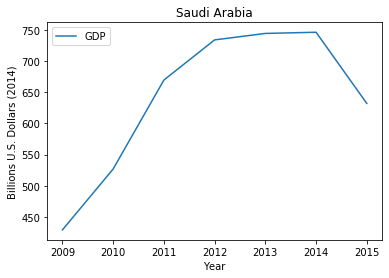

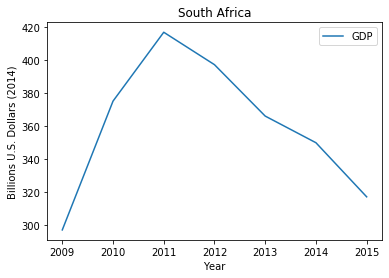

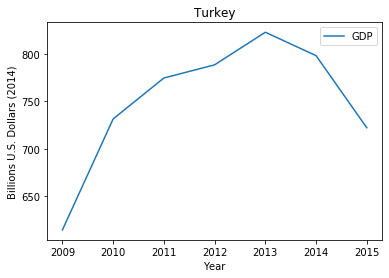

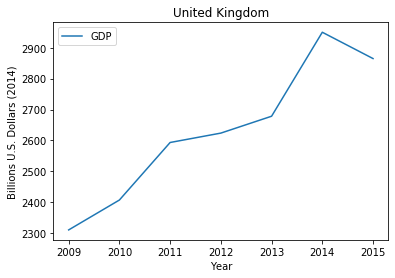

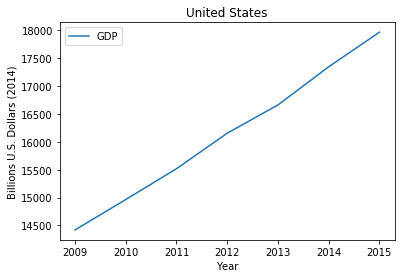

In [36]:
# A series of plots can be created in a for loop
for country in g20:
    plt.figure()
    plotGDP(country)

Create a plot for each country showing military expenditure (same information as above, but does not use Seaborn)

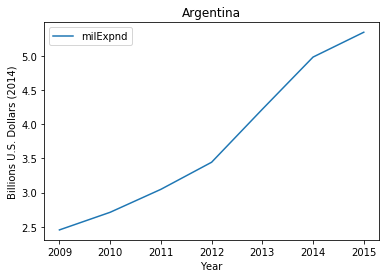

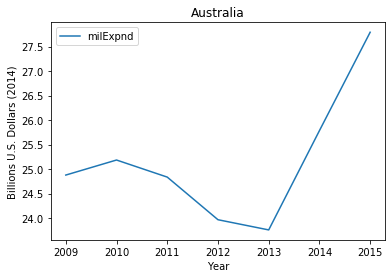

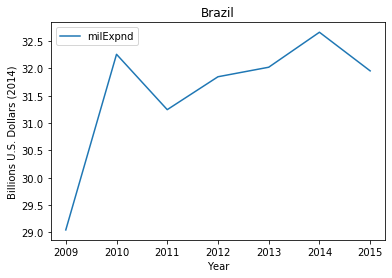

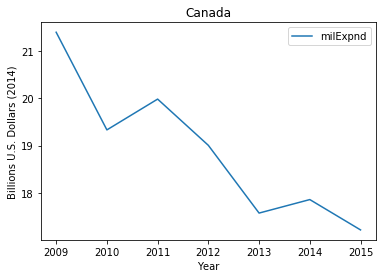

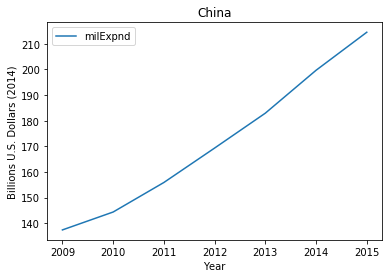

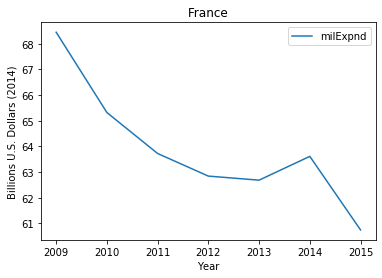

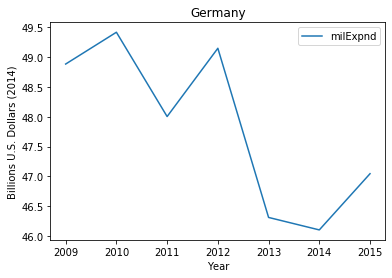

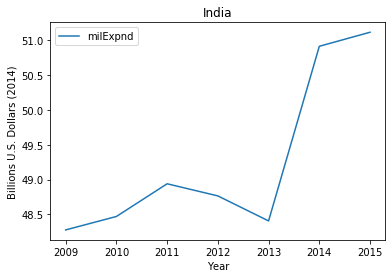

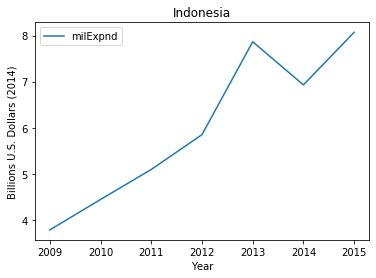

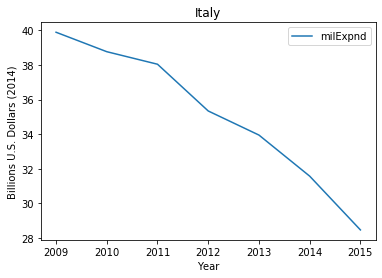

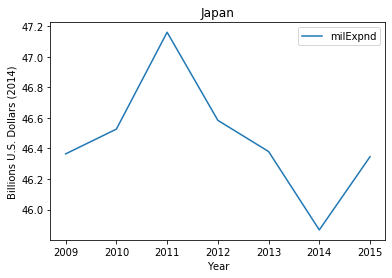

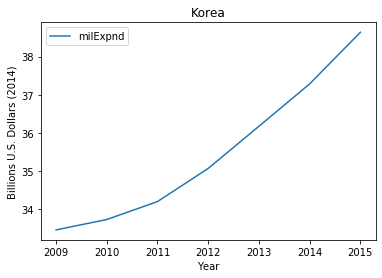

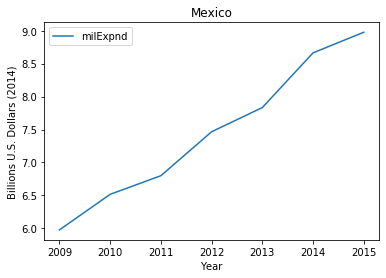

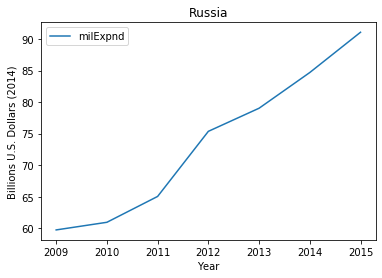

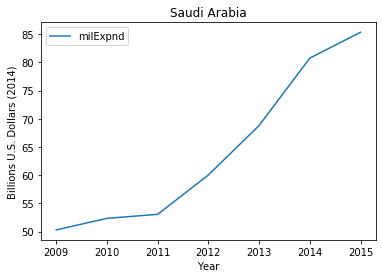

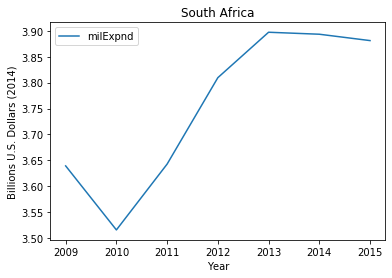

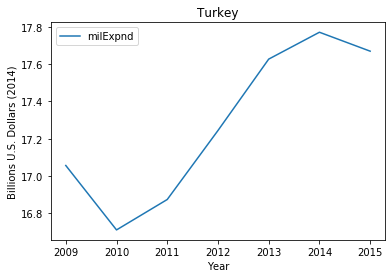

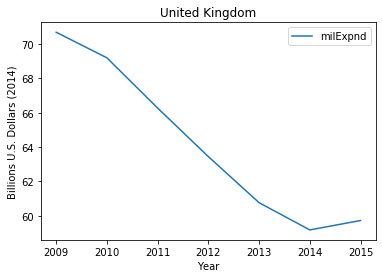

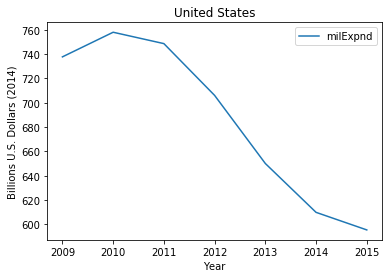

In [37]:
for country in g20:
    plt.figure()
    plotMilSpend(country)

Plots for GDP per capita for each country

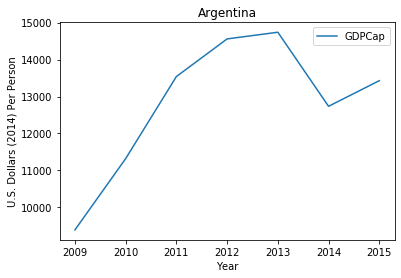

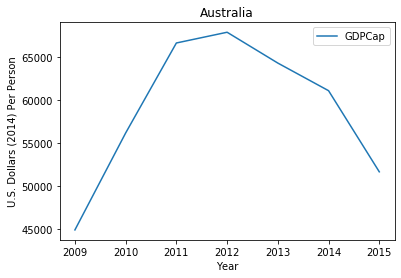

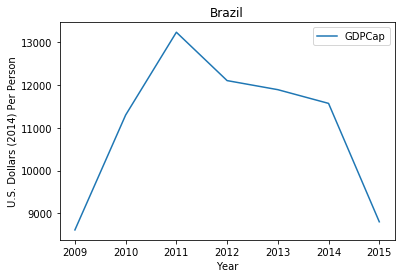

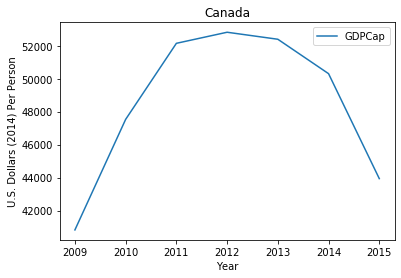

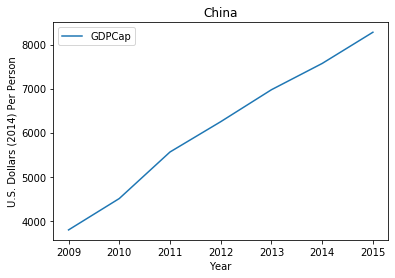

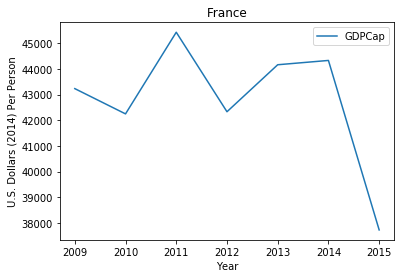

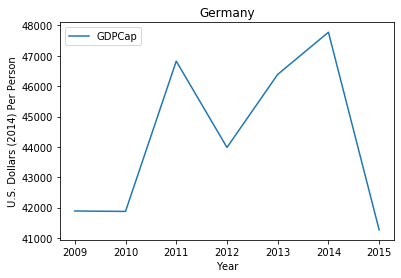

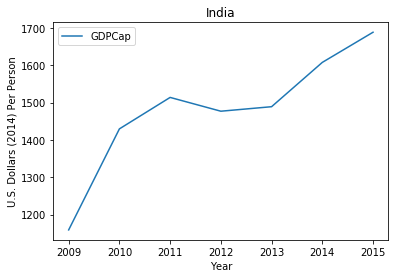

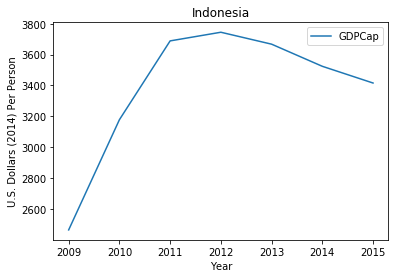

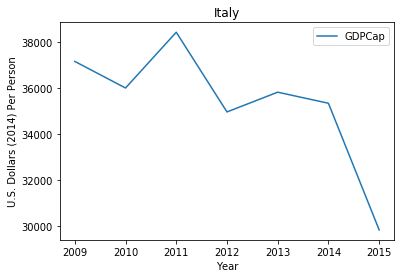

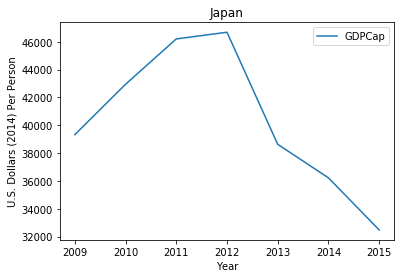

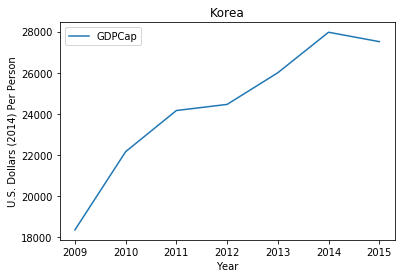

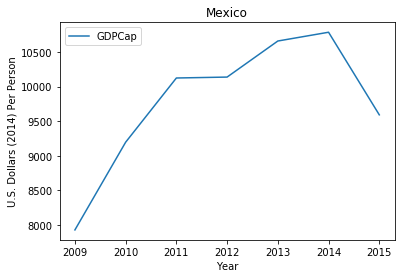

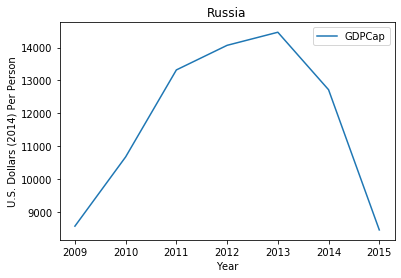

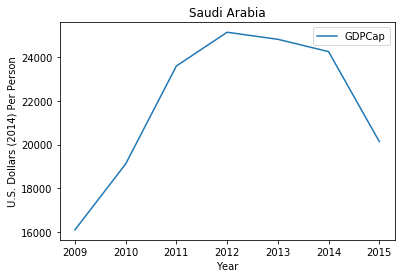

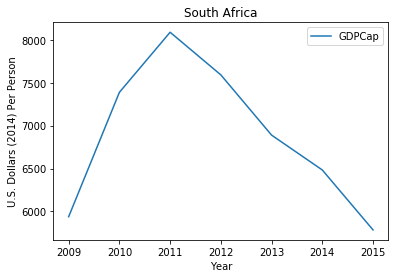

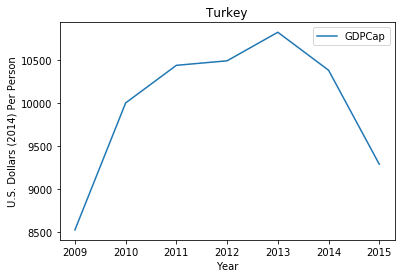

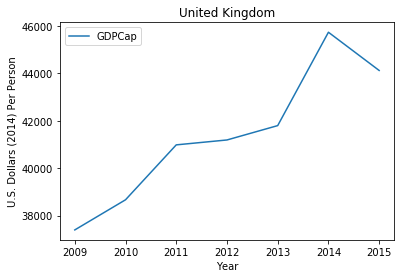

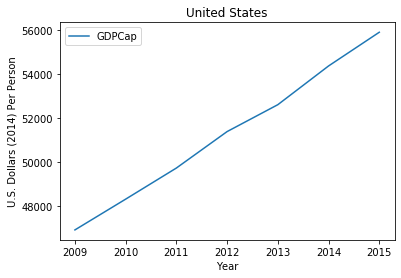

In [38]:
for country in g20:
    plt.figure()
    plotGDPCapita(country)

Plots for military expenditure per capita for each country

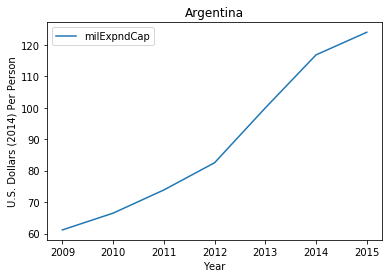

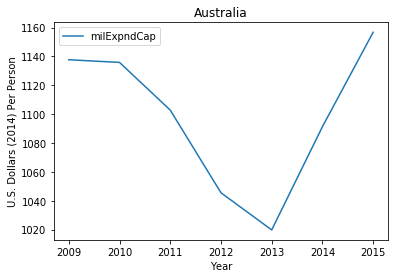

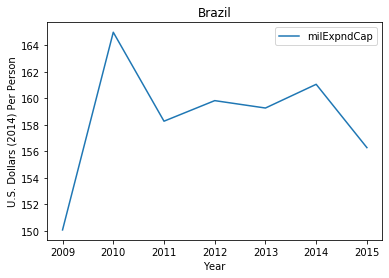

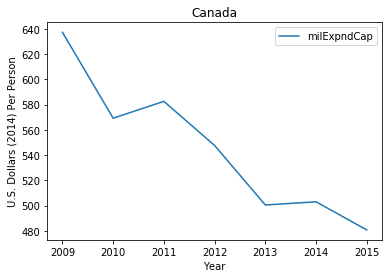

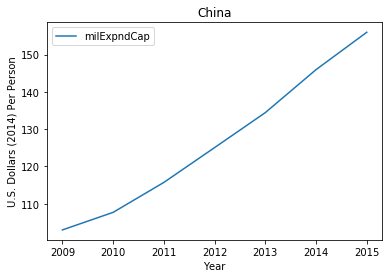

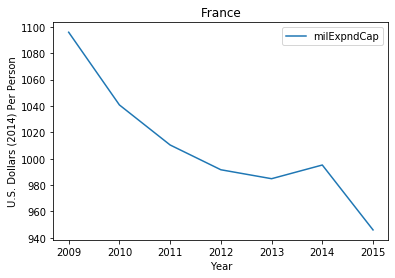

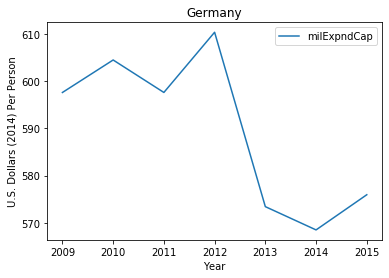

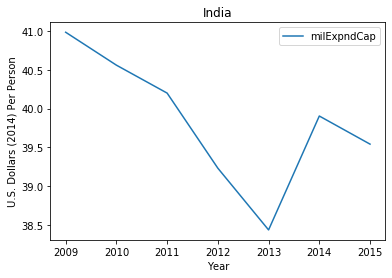

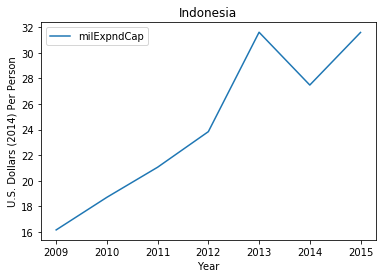

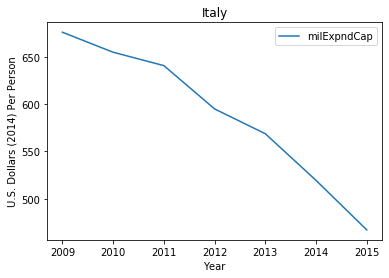

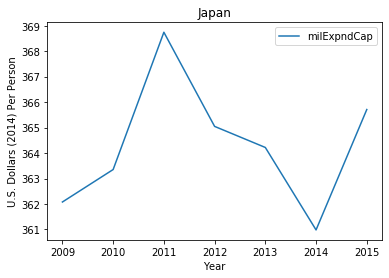

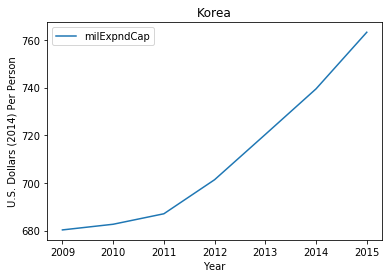

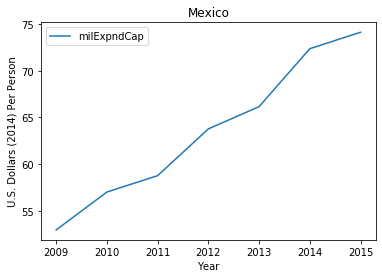

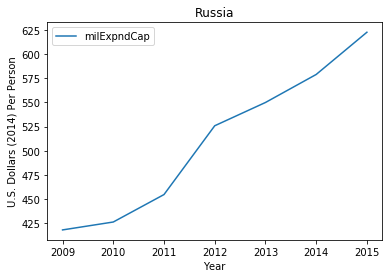

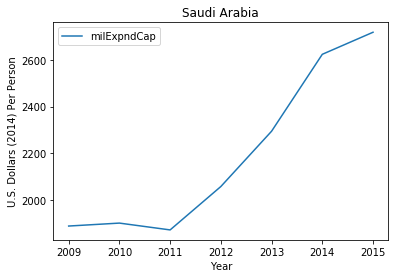

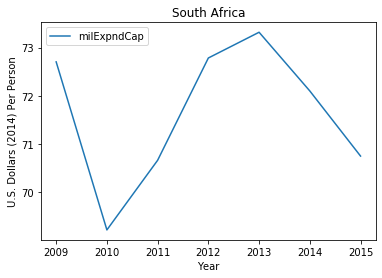

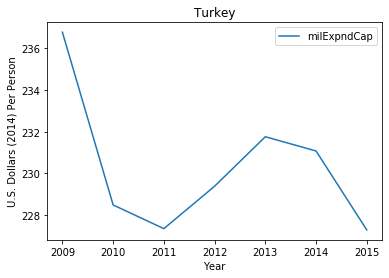

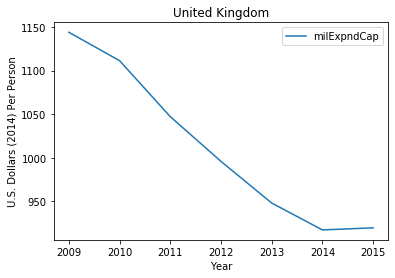

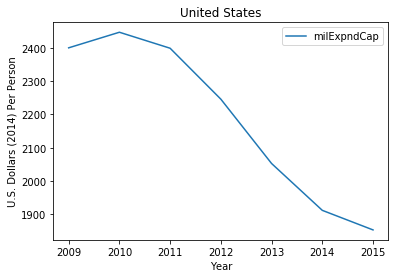

In [39]:
for country in g20:
    plt.figure()
    plotMilPerCapita(country)

List of top ten countries in terms of military expenditure

In [40]:
topten()

,Country
1,United States
2,China
3,Russia
4,Saudi Arabia
5,United Kingdom
6,France
7,India
8,Germany
9,Japan
10,Italy


In [41]:
# Save it to a variable
top10MilSpend = topten()

List of top ten countries in terms of military expenditure per capita

In [42]:
topten_perCapita()

,Country
1,Saudi Arabia
2,United States
3,Australia
4,United Kingdom
5,France
6,Korea
7,Italy
8,Canada
9,Russia
10,Germany


Subset the G20 data to only those countries in the top ten for military expenditure

In [43]:
# Make a list and then subset dataframe if named column is in list
top10List = top10MilSpend['Country'].tolist()
top10Subset = df_g20[df_g20['Country'].isin (top10List)]
top10Subset = top10Subset.drop(['Year','GDP','GDPCap','Population','milExpndCap'], axis=1)

In [44]:
# Sorted by country, alphabetically
top10Subset.head(10)

,Country,milExpnd
4,China,137.400846
5,France,68.451289
6,Germany,48.884513
7,India,48.277116
9,Italy,39.897138
10,Japan,46.364494
13,Russia,59.730225
14,Saudi Arabia,50.299257
17,United Kingdom,70.679182
18,United States,737.746788


Sum all military expenditures between 2009 and 2015.

In [45]:
# Redure the military spending across years into a sum total by grouping by Column A and summing values of Column B
totalByCountry = top10Subset.groupby(by=['Country'])['milExpnd'].sum()
totalByCountry = pd.DataFrame(totalByCountry)
totalByCountry.head(10)

,milExpnd
Country,
China,1204.069430
France,447.390001
Germany,334.915409
India,344.888737
Italy,246.036424
Japan,325.228186
Russia,515.882383
Saudi Arabia,450.678544
United Kingdom,449.266836


Compare each country's military expenditures to the total military expenditures of the top ten countries

In [46]:
# Create a new column and calculate percentage of total military spending for each country
pd.set_option('display.precision',2)
totalByCountry["Percentage of Top 10 Military Spending"] = ""
totalByCountry["Percentage of Top 10 Military Spending"] = (totalByCountry['milExpnd'] / totalByCountry['milExpnd'].sum()) * 100
totalByCountry

,milExpnd,Percentage of Top 10 Military Spending
Country,,
China,1204.07,13.20
France,447.39,4.90
Germany,334.92,3.67
India,344.89,3.78
Italy,246.04,2.70
Japan,325.23,3.56
Russia,515.88,5.65
Saudi Arabia,450.68,4.94
United Kingdom,449.27,4.92


Create table showing percentage growth in military spending between 2009 and 2015

In [47]:
# Percentage Growth in Military Spending 2009 to 2015
df_Growth = df_MilSpendi.unstack()
df_Growth["PercentageChange"] = ""

results = []
for country in g20:
    results.append(calc_percentage(2009,2015,country,df_MilSpendi))
    
m = np.asarray(results)
df_Growth["PercentageChange"] = m
format = lambda x: '%.2f' % x
df_Growth = df_Growth.applymap(format)
df_Growth

milExpnd                                                  \
Year               2009    2010    2011    2012    2013    2014    2015   
Country                                                                   
Argentina          2.46    2.71    3.05    3.44    4.22    4.98    5.34   
Australia         24.88   25.18   24.84   23.96   23.76   25.78   27.79   
Brazil            29.05   32.26   31.24   31.85   32.02   32.66   31.95   
Canada            21.40   19.33   19.99   19.00   17.57   17.85   17.21   
China            137.40  144.38  155.90  169.32  182.93  199.65  214.49   
France            68.45   65.32   63.73   62.84   62.69   63.61   60.75   
Germany           48.88   49.42   48.00   49.15   46.31   46.10   47.05   
India             48.28   48.47   48.94   48.77   48.41   50.91   51.12   
Indonesia          3.78    4.44    5.09    5.85    7.86    6.93    8.07   
Italy             39.90   38.77   38.05   35.34   33.95   31.57   28.46   
Japan             46.36   46.53   47.16   46.58   46.38   45.87   46.35   
Korea             33.46   33.73   34.20   35.07   36.18   37.29   38.64   
Mexico             5.98    6.52    6.80    7.47    7.83    8.66    8.98   
Russia            59.73   60.94   65.04   75.36   79.03   84.70   91.08   
Saudi Arabia      50.30   52.35   53.06   60.04   68.81   80.76   85.35   
South Africa       3.64    3.52    3.64    3.81    3.90    3.89    3.88   
Turkey            17.06   16.71   16.87   17.24   17.63   17.77   17.67   
United Kingdom    70.68   69.19   66.27   63.45   60.77   59.18   59.73   
United States    737.75  757.99  748.65  706.08  650.08  609.91  595.47   

               PercentageChange  
Year                             
Country                          
Argentina                117.58  
Australia                 11.72  
Brazil                    10.01  
Canada                   -19.59  
China                     56.10  
France                   -11.26  
Germany                   -3.76  
India                      5.88  
Indonesia                113.28  
Italy                    -28.67  
Japan                     -0.04  
Korea                     15.49  
Mexico                    50.18  
Russia                    52.49  
Saudi Arabia              69.69  
South Africa               6.65  
Turkey                     3.59  
United Kingdom           -15.49  
United States            -19.29